<a href="https://colab.research.google.com/github/sakib927/My-Data-Science/blob/main/tea_sickness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential

In [ ]:
import tensorflow as tf

import tensorflow_datasets as tfds


In [ ]:
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import  RMSprop, adam
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
import theano
from tqdm import tqdm 
from skimage import io

In [ ]:
path_test = "/content/drive/MyDrive/tea sickness dataset"
class_names = ['Anthracnose','algal leaf','bird eye spot','brown blight','gray light','healthy','red leaf spot','white leaf spot']
nb_classes = len(class_names)
image_size = (120,120)

In [ ]:
def load_data():
    
    datasets = ['/content/drive/MyDrive/tea sickness dataset']
    images = []
    labels = []

    # iterate through training and test sets
    count =0
    for dataset in datasets:

        # iterate through folders in each dataset
        for folder in os.listdir(dataset):

            if folder in ['Anthracnose']: label = 1
            elif folder in ['algal leaf']: label = 2
            elif folder in ['bird eye spot']: label = 3
            elif folder in ['brown blight']: label = 4
            elif folder in ['gray light']: label = 5
            elif folder in ['healthy']: label = 6
            elif folder in ['red leaf spot']: label = 7
            elif folder in ['white spot']: label = 8
            else : print(700)


            # iterate through each image in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # get pathname of each image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open 
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, image_size)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

In [ ]:
images, labels = load_data()

100%|██████████| 113/113 [00:02<00:00, 53.27it/s]


In [ ]:
images, labels = shuffle(images, labels, random_state=10)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

In [ ]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 708
Number of validation examples: 89
Number of testing examples: 88
Training images are of shape: (708, 120, 120, 3)
Training labels are of shape: (708,)
Validation images are of shape: (89, 120, 120, 3)
Validation labels are of shape: (89,)
Test images are of shape: (88, 120, 120, 3)
Test labels are of shape: (88,)


In [ ]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

In [ ]:
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
nb_classes = 9
nb_epochs = 10
img_rows, img_columns = 120, 120
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(9,  activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2  = model.fit(train_images, train_labels, epochs = nb_epochs, verbose = 1, validation_data = (test_images, test_labels))

Epoch 1/10
23/23 [==============================] - 12s 486ms/step - loss: 1.9192 - accuracy: 0.2726 - val_loss: 1.2709 - val_accuracy: 0.4205
Epoch 2/10
23/23 [==============================] - 11s 479ms/step - loss: 1.1349 - accuracy: 0.4986 - val_loss: 1.0441 - val_accuracy: 0.5682
Epoch 3/10
23/23 [==============================] - 11s 483ms/step - loss: 0.9419 - accuracy: 0.6116 - val_loss: 1.1008 - val_accuracy: 0.4659
Epoch 4/10
23/23 [==============================] - 11s 484ms/step - loss: 0.8824 - accuracy: 0.6201 - val_loss: 0.9310 - val_accuracy: 0.6364
Epoch 5/10
23/23 [==============================] - 12s 508ms/step - loss: 0.6791 - accuracy: 0.7444 - val_loss: 0.9703 - val_accuracy: 0.6250
Epoch 6/10
23/23 [==============================] - 11s 485ms/step - loss: 0.5248 - accuracy: 0.8065 - val_loss: 0.8458 - val_accuracy: 0.6591
Epoch 7/10
23/23 [==============================] - 11s 483ms/step - loss: 0.4355 - accuracy: 0.8517 - val_loss: 0.9481 - val_accuracy: 0.6250

In [ ]:
score = model.evaluate(test_images, test_labels, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.8214559555053711
Test accuracy:  0.7159090638160706


In [ ]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(10)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

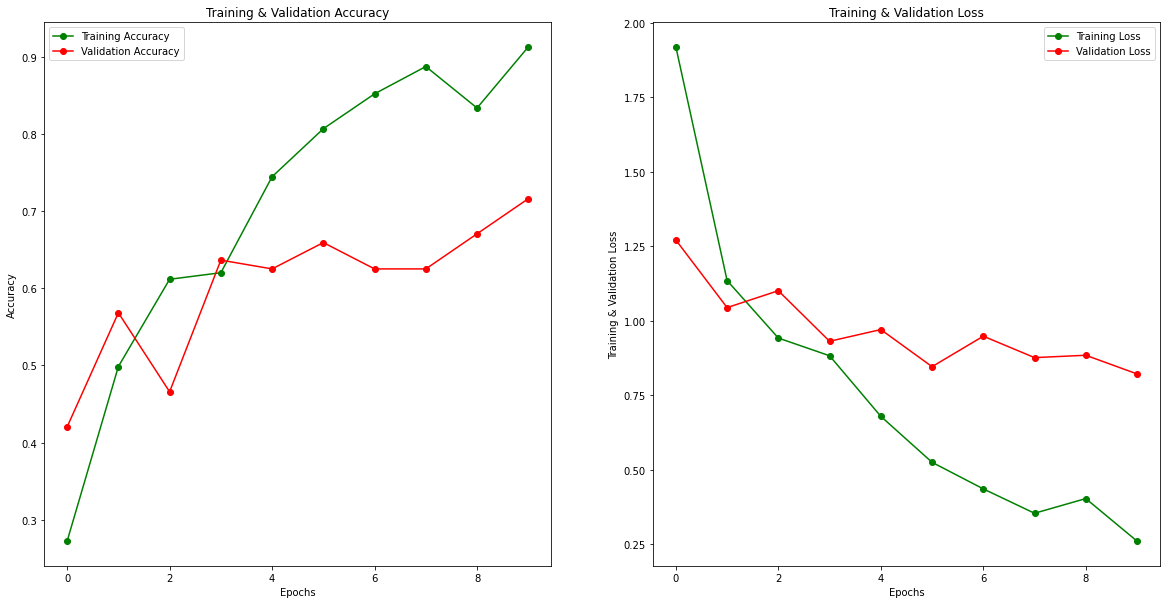

In [ ]:
plot_accuracy_loss_chart(history2)

In [ ]:
results = model.evaluate(test_images, test_labels)

print("Loss of the model  is - test ", results[0])
print("Accuracy of the model is - test", results[1]*100, "%")


results = model.evaluate(val_images, val_labels)

print("Loss of the model  is - val ", results[0])
print("Accuracy of the model is - val", results[1]*100, "%")

results = model.evaluate(train_images, train_labels)

print("Loss of the model  is - train ", results[0])
print("Accuracy of the model is - train", results[1]*100, "%")

3/3 [==============================] - 0s 108ms/step - loss: 0.8215 - accuracy: 0.7159
Loss of the model  is - test  0.8214559555053711
Accuracy of the model is - test 71.59090638160706 %
3/3 [==============================] - 0s 115ms/step - loss: 0.8284 - accuracy: 0.6854
Loss of the model  is - val  0.8283634185791016
Accuracy of the model is - val 68.53932738304138 %
23/23 [==============================] - 3s 118ms/step - loss: 0.2017 - accuracy: 0.9308
Loss of the model  is - train  0.20166154205799103
Accuracy of the model is - train 93.07909607887268 %


In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(test_images)
predictions = np.argmax(predictions,axis=1)
predictions[:300]

array([2, 3, 5, 3, 6, 7, 7, 4, 4, 5, 7, 3, 8, 5, 5, 4, 7, 8, 3, 7, 3, 7,
       5, 2, 6, 4, 8, 4, 7, 7, 7, 4, 4, 5, 7, 5, 1, 5, 6, 5, 4, 6, 1, 7,
       4, 2, 5, 3, 5, 4, 7, 3, 3, 2, 7, 7, 3, 4, 4, 5, 4, 5, 3, 6, 3, 3,
       5, 4, 5, 2, 4, 4, 2, 4, 5, 8, 7, 2, 2, 4, 3, 7, 7, 5, 7, 5, 5, 8])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import pandas as pd

cm = confusion_matrix(test_labels, predictions)
cm = pd.DataFrame(cm, index = ['1', '2', '3','4','5','6','7','8'], columns = ['1', '2', '3','4','5','6','7','8'])
cm

,1,2,3,4,5,6,7,8
1,2,0,3,0,5,0,0,0
2,0,6,0,1,0,0,0,0
3,0,0,7,0,3,0,0,0
4,0,0,0,13,0,0,1,0
5,0,0,3,0,10,0,0,0
6,0,0,0,0,0,5,0,0
7,0,0,0,0,1,0,15,0
8,0,2,0,4,0,0,2,5


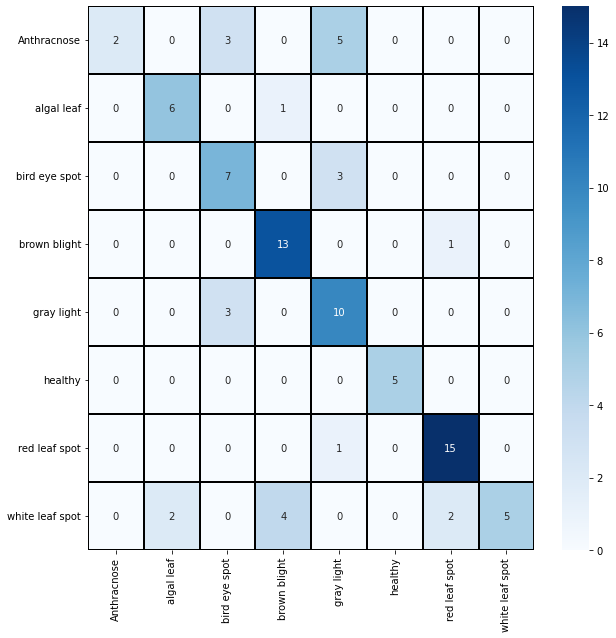

In [ ]:
import seaborn as sns
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)
